<span style="font-size:75px;">🚢</span>
<span style="color:#0077b6; font-size:75px; font-weight:bold;">
Titanic Survival Prediction - Exploratory Data Analysis (EDA)
</span>


This notebook aims to understand the structure and patterns in the Titanic dataset in order to prepare for model training. We will:

- Explore the dataset (shape, columns, types, missing values)
- Visualize key features like age, sex, class, and survival
- Identify columns to clean or drop
- Decide which features might be useful for the model

---

🔹 **Dataset Files:**
- `train.csv`: Passenger records with survival labels (0 = died, 1 = survived)
- `test.csv`: Passenger records without survival labels (used for prediction)

---

👩‍💻 By understanding the dataset, we can clean it properly and build strong features for training.

---


## Data Overview

#### Importing Libraries

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading Data

In [113]:
# Load raw training and test data
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (891, 12)
Test shape: (418, 11)


#### Data Exploration

In [114]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
train_df.shape

(891, 12)

In [117]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [118]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [119]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [151]:
train_df.describe(exclude='number')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


In [152]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [153]:
train_df.duplicated().sum()

np.int64(0)

In [154]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### Visualization

####  Univariate Analysis

In [155]:
custom_palette = ["#98d6f8", "#bff793"]  

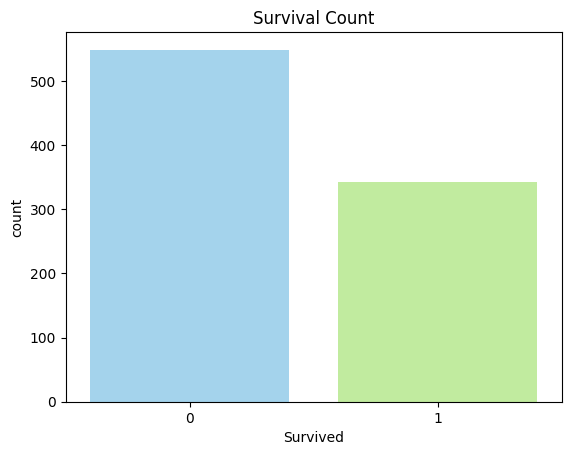

In [156]:
# Survival count
sns.countplot(data=train_df, x='Survived',palette=custom_palette)
plt.title("Survival Count")
plt.show()

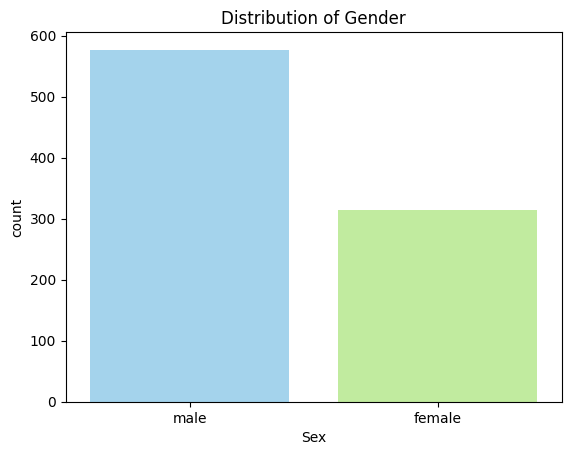

In [157]:
# Gender
sns.countplot(data=train_df, x='Sex', palette=custom_palette)
plt.title("Distribution of Gender")
plt.show()

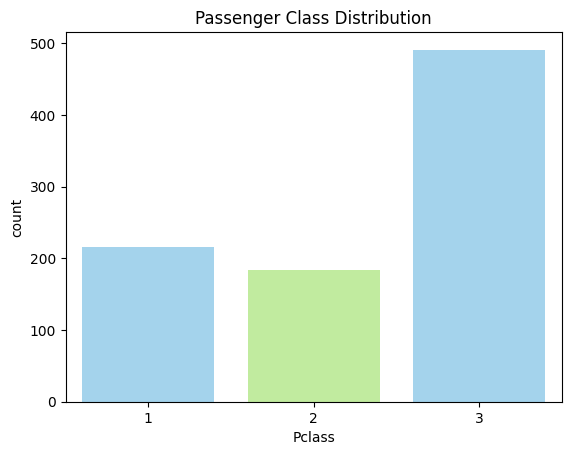

In [158]:
# Pclass
sns.countplot(data=train_df, x='Pclass', palette=custom_palette)
plt.title("Passenger Class Distribution")
plt.show()


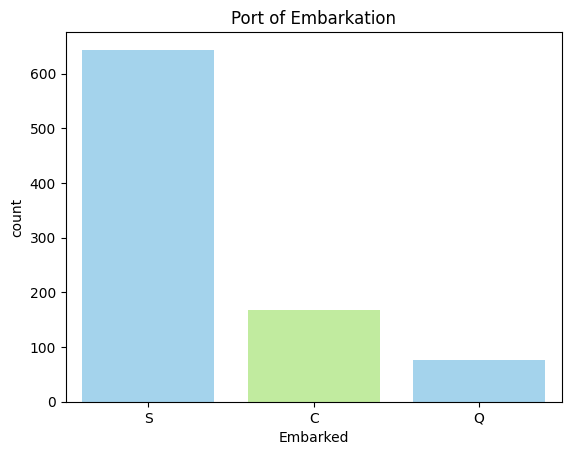

In [159]:
# Embarked
sns.countplot(data=train_df, x='Embarked', palette=custom_palette)
plt.title("Port of Embarkation")
plt.show()

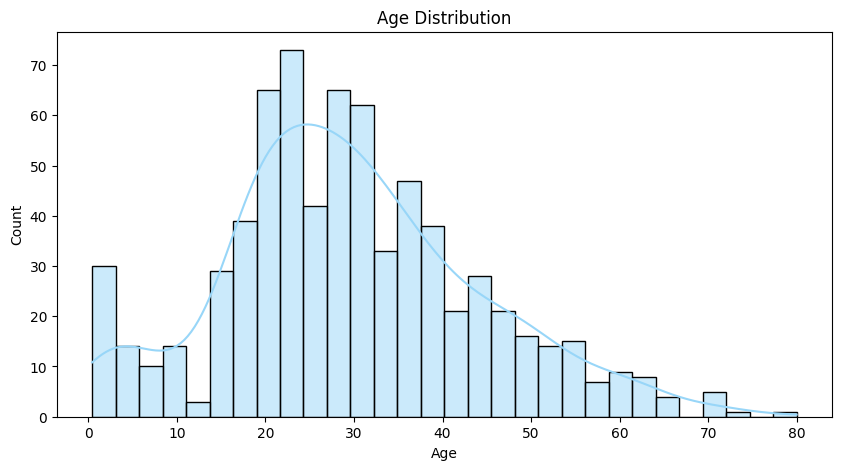

In [168]:
# Age distribution
plt.figure(figsize=(10,5))
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True,color="#98d6f8")
plt.title("Age Distribution")
plt.show()


#### Bivariate Analysis

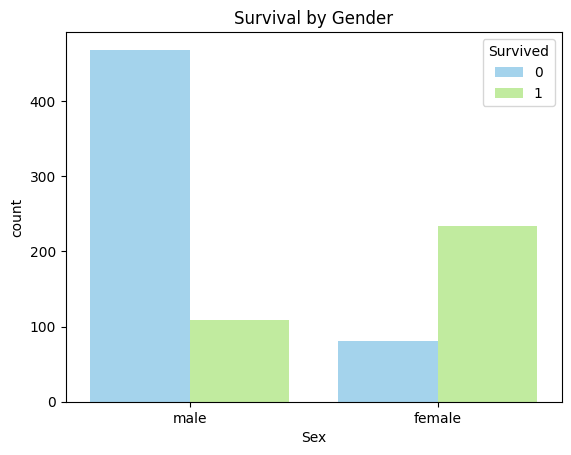

In [161]:
sns.countplot(x="Sex", hue="Survived", data=train_df,palette=custom_palette)
plt.title("Survival by Gender")
plt.show()

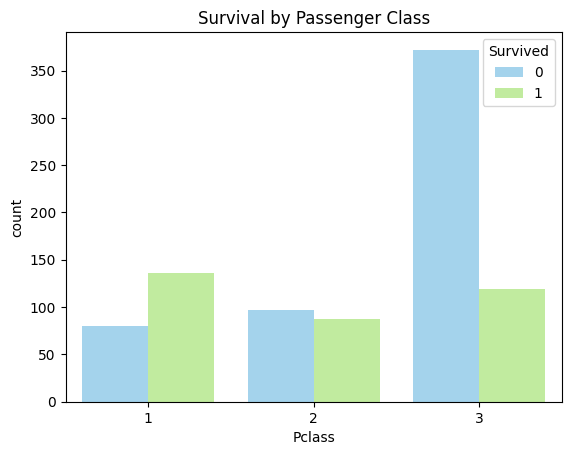

In [162]:
sns.countplot(data=train_df, x='Pclass', hue='Survived',palette=custom_palette)
plt.title("Survival by Passenger Class")
plt.show()

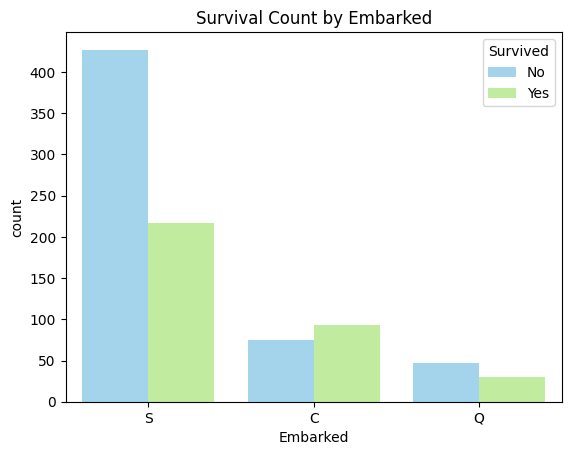

In [163]:
sns.countplot(data=train_df, x='Embarked', hue='Survived', palette=custom_palette)
plt.title("Survival Count by Embarked")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

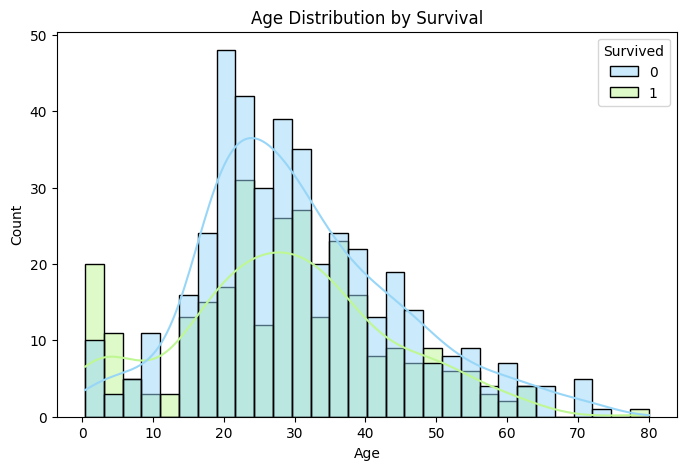

In [164]:
plt.figure(figsize=(8,5))
sns.histplot(data=train_df, x='Age', hue='Survived', bins=30, kde=True, palette=custom_palette)
plt.title("Age Distribution by Survival")
plt.show()

Text(0.5, 1.0, 'Age Distribution by Survival')

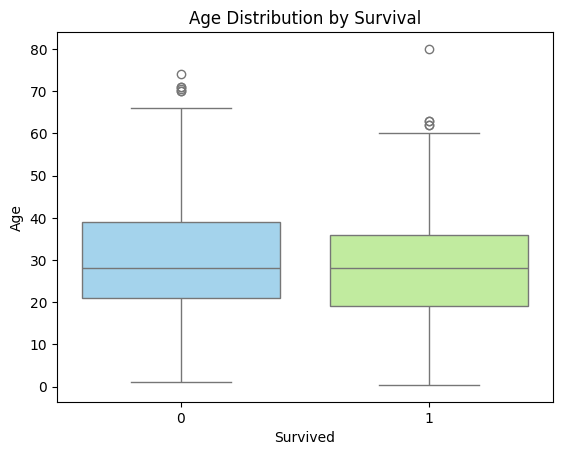

In [165]:
sns.boxplot(x="Survived", y="Age", data=train_df,palette=custom_palette)
plt.title("Age Distribution by Survival")

#### Correlation

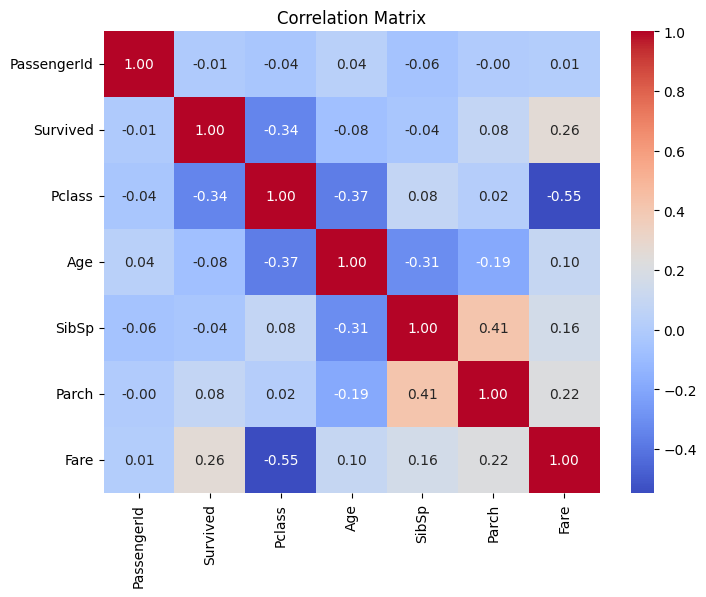

In [167]:
numeric_df = train_df.select_dtypes(include=['number'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Key Insights:

---